In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import re
from google.colab.patches import cv2_imshow
import shutil

In [ ]:
%cd /content/drive/My Drive/
%pip install tqdm
from tqdm.notebook import tqdm
import time

/content/drive/My Drive


In [ ]:
%ls
min=4823#対象画像の最初のディレクトリ番号
max=5241#対象画像の最後のディレクトリ番号

'Colab Notebooks'/       smis_pants/              smis_skirt/
 deepfashion.tar         smis_pants_mask/         smis_skirt_mask/
 new_persons@            smis_persons/            smis_tops/
 new_segmentations@      smis_right-shoes/        smis_tops_mask/
 smis_left-shoes/        smis_right-shoes_mask/
 smis_left-shoes_mask/   smis_segmentations/


In [ ]:
im_seglist = []
for i in range(min,max+1):
  im_segpath =f"new_segmentations/segmentation/{i}.jpg"
  #print(os.listdir(im_segpath))
  im_seglist.append(im_segpath)
  #print(im_seglist)
print(len(im_seglist))

419


In [ ]:
im_perlist = []

for i in range(min,max+1):
  im_perpath =f"new_persons/person/{i}.jpg"
  #print(os.listdir(im_segpath))
  im_perlist.append(im_perpath)
print(len(im_perlist))

419


In [ ]:
count=min
for seg,per in tqdm(zip(im_seglist,im_perlist),total=len(im_seglist)):
  seg=cv2.imread(seg)
  per=cv2.imread(per)
  image_seg=seg.transpose(2,0,1)
  np.set_printoptions(threshold=np.inf)
  #print(image_seg[0])
  image_per=per
  #print(image_seg.shape)
  #print(image_per.shape)
  zero=np.zeros((1,256,192))

  #tops
  for i in range(256):
    for j in range(192):
      if image_seg[0][i][j]==0 and image_seg[1][i][j]==85 and image_seg[2][i][j]==255:
        zero[0][i][j]=1
  
  mask=zero.transpose(1,2,0)
  cv2.imwrite(f"smis_tops_mask/mask/{count}.jpg",mask*255)
  #cv2_imshow(mask*255)

  tops=np.zeros((256,192,3))

  tops[:,:,0]=mask[:,:,0]*image_per[:,:,0]
  tops[:,:,1]=mask[:,:,0]*image_per[:,:,1]
  tops[:,:,2]=mask[:,:,0]*image_per[:,:,2]

  #cv2_imshow(tops)

  #cv2.imwrite(f"smis_tops/tops/{count}.jpg",tops)
  



  #pants
  zero=np.zeros((1,256,192))
  for i in range(256):
    for j in range(192):
      if image_seg[0][i][j]==85 and image_seg[1][i][j]==85 and image_seg[2][i][j]==0:
        zero[0][i][j]=1
  
  mask=zero.transpose(1,2,0)
  cv2.imwrite(f"smis_pants_mask/mask/{count}.jpg",mask*255)
  #cv2_imshow(mask*255)

  pants=np.zeros((256,192,3))

  pants[:,:,0]=mask[:,:,0]*image_per[:,:,0]
  pants[:,:,1]=mask[:,:,0]*image_per[:,:,1]
  pants[:,:,2]=mask[:,:,0]*image_per[:,:,2]

  #cv2_imshow(pants)

  #cv2.imwrite(f"smis_pants/pants/{count}.jpg",pants)




  #right-shoes
  zero=np.zeros((1,256,192))
  for i in range(256):
    for j in range(192):
      if image_seg[0][i][j]==0 and image_seg[1][i][j]==170 and image_seg[2][i][j]==255:
        zero[0][i][j]=1
        #print('7')
  
  mask=zero.transpose(1,2,0)
  cv2.imwrite(f"smis_right-shoes_mask/mask/{count}.jpg",mask*255)
  #cv2_imshow(mask*255)

  right_shoes=np.zeros((256,192,3))

  right_shoes[:,:,0]=mask[:,:,0]*image_per[:,:,0]
  right_shoes[:,:,1]=mask[:,:,0]*image_per[:,:,1]
  right_shoes[:,:,2]=mask[:,:,0]*image_per[:,:,2]

  #cv2_imshow(pants)

  #cv2.imwrite(f"smis_right-shoes/shoes/{count}.jpg",right_shoes)


  #left-shoes
  zero=np.zeros((1,256,192))
  for i in range(256):
    for j in range(192):
      if image_seg[0][i][j]==0 and image_seg[1][i][j]==255 and image_seg[2][i][j]==255:
        zero[0][i][j]=1
        #print('7')
  
  mask=zero.transpose(1,2,0)
  cv2.imwrite(f"smis_left-shoes_mask/mask/{count}.jpg",mask*255)
  #cv2_imshow(mask*255)

  left_shoes=np.zeros((256,192,3))

  left_shoes[:,:,0]=mask[:,:,0]*image_per[:,:,0]
  left_shoes[:,:,1]=mask[:,:,0]*image_per[:,:,1]
  left_shoes[:,:,2]=mask[:,:,0]*image_per[:,:,2]

  #cv2_imshow(pants)

  #cv2.imwrite(f"smis_left-shoes/shoes/{count}.jpg",left_shoes)


  #skirt
  zero=np.zeros((1,256,192))
  for i in range(256):
    for j in range(192):
      if image_seg[0][i][j]==0 and image_seg[1][i][j]==128 and image_seg[2][i][j]==0:
        zero[0][i][j]=1
        #print('7')
  
  mask=zero.transpose(1,2,0)
  cv2.imwrite(f"smis_skirt_mask/mask/{count}.jpg",mask*255)
  #cv2_imshow(mask*255)

  skirt=np.zeros((256,192,3))

  skirt[:,:,0]=mask[:,:,0]*image_per[:,:,0]
  skirt[:,:,1]=mask[:,:,0]*image_per[:,:,1]
  skirt[:,:,2]=mask[:,:,0]*image_per[:,:,2]

  #cv2_imshow(pants)

  #cv2.imwrite(f"smis_skirt/skirt/{count}.jpg",skirt)



  count+=1
  time.sleep(0.1)
print(f"処理数{count},最終番号{count-1}")


処理数5242,最終番号5241


In [ ]:
im=cv2.imread("smis_tops_mask/mask/0.jpg")
print(im.shape)

(256, 192, 3)


In [ ]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import cv2
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import time
import subprocess as sp
from datetime import datetime, timedelta, timezone
import math
from torchvision import datasets, models, transforms

In [ ]:
%cd drive/My\ Drive
dataroot1="smis_tops_mask"
dataroot2="smis_skirt_mask"
dataroot3="smis_right-shoes_mask"
dataroot4="smis_left-shoes_mask"
dataroot5="smis_pants_mask"
num_thread=0
batch_size=16
num_epoch=15
img_size=(128,96)
lr=0.0002
b1=0.5
b2=0.999
ngpu=1

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [ ]:
a_dataset=dset.ImageFolder(root=dataroot1,
                           transform=transforms.Compose([transforms.Resize(img_size),transforms.Grayscale(),transforms.ToTensor(),]))
a_dataloader=torch.utils.data.DataLoader(a_dataset,batch_size=batch_size,shuffle=False,num_workers=num_thread)
b_dataset=dset.ImageFolder(root=dataroot2,
                           transform=transforms.Compose([transforms.Resize(img_size),transforms.Grayscale(),transforms.ToTensor(),]))
b_dataloader=torch.utils.data.DataLoader(b_dataset,batch_size=batch_size,shuffle=False,num_workers=num_thread)
c_dataset=dset.ImageFolder(root=dataroot3,
                           transform=transforms.Compose([transforms.Resize(img_size),transforms.Grayscale(),transforms.ToTensor(),]))
c_dataloader=torch.utils.data.DataLoader(c_dataset,batch_size=batch_size,shuffle=False,num_workers=num_thread)
d_dataset=dset.ImageFolder(root=dataroot4,
                           transform=transforms.Compose([transforms.Resize(img_size),transforms.Grayscale(),transforms.ToTensor(),]))
d_dataloader=torch.utils.data.DataLoader(d_dataset,batch_size=batch_size,shuffle=False,num_workers=num_thread)
e_dataset=dset.ImageFolder(root=dataroot5,
                           transform=transforms.Compose([transforms.Resize(img_size),transforms.Grayscale(),transforms.ToTensor(),]))
e_dataloader=torch.utils.data.DataLoader(e_dataset,batch_size=batch_size,shuffle=False,num_workers=num_thread)
device=torch.device("cuda:0")  

In [ ]:
len(e_dataset)

5242

torch.Size([11, 1, 128, 96])
88


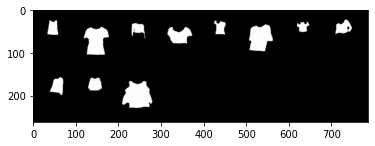

In [ ]:
for n,i in enumerate(p_dataloader):
  print(i[0].size())
  print(88)
  plt.imshow(np.transpose(vutils.make_grid(i[0][:16], padding=2, normalize=True).cpu(),(1,2,0)))